In [23]:
#Dependancies
import matplotlib.pyplot as plt
import pandas as pd
import requests
from datetime import datetime
import seaborn as sns
sns.set(style="darkgrid")

In [24]:
# USE MARS INSIGHT PROJECT API TO CREATE DAILY WEATHER REPORT OF MARS 
# Documentation: https://api.nasa.gov/assets/insight/InSight%20Weather%20API%20Documentation.pdf

In [25]:
from api_key import nasa_key
nasa_key
base_url ='https://api.nasa.gov/insight_weather/?'
query_url = f'{base_url}api_key={nasa_key}&feedtype=json&ver=1.'

In [26]:
query_url

'https://api.nasa.gov/insight_weather/?api_key=x0vI6p6jUZL6wftZ2XccsfpVahCArjfeIgxdkqmR&feedtype=json&ver=1.'

In [27]:
nasa_response = requests.get(query_url)
nasa_json=nasa_response.json()


In [28]:
sol_keys=nasa_json["sol_keys"]
print(f'A sol is a Martian day, the data has up to date information on the last {len(sol_keys)} Sols.')

A sol is a Martian day, the data has up to date information on the last 7 Sols.


In [29]:
#since only most recent 7 sol's are avaiable need to make the [sol] dynamic
#dynamic dates
sol_key=nasa_json["sol_keys"]
sol_list=[]
for sol in sol_key:
    sol_list.append(sol)

In [30]:
# Convert Martian date to earth date for all sol articles
date_list=[]
numerical_dates=[]

for day in sol_list:
    utc_day=nasa_json[day]['First_UTC']
    utc=datetime.strptime(utc_day, '%Y-%m-%dT%H:%M:%SZ')
    date_formatted=utc.strftime("%d-%b-%Y")
    numeric_formatted = utc.strftime("%d-%m-%Y")
    date_list.append(date_formatted)
    numerical_dates.append(numeric_formatted)

In [31]:
# Metrics available for each Sol:
# Each sol has linear averages for Temperature (AT), horizontal wind speed (HWS) and atmostpheric pressure (PRE)
print(f'The Temperature of sol_1 is {nasa_json[sol_list[0]]["AT"]["av"]} F.')
print(f'The average horizontal windspeed of sol_1 is {nasa_json[sol_list[0]]["HWS"]["av"]} m/s.')
print(f'The average atmospheric pressure of sol_1 is {nasa_json[sol_list[0]]["PRE"]["av"]} Pa.')
# There is also a most common wind direction measure
print(f'wind direction: {nasa_json[sol_list[0]]["WD"]["most_common"]["compass_point"]}')

The Temperature of sol_1 is -59.627 F.
The average horizontal windspeed of sol_1 is 4.762 m/s.
The average atmospheric pressure of sol_1 is 661.28 Pa.
wind direction: WNW


In [32]:
# iterate through each sol
try:
    for i in range(0,7):
        print(f'{date_list[i]}: \n AT: {nasa_json[sol_list[i]]["AT"]["av"]} F \n HWS: {nasa_json[sol_list[i]]["HWS"]["av"]} m/s \n PRE: {nasa_json[sol_list[i]]["PRE"]["av"]} Pa.')
except KeyError:
    pass

15-Apr-2020: 
 AT: -59.627 F 
 HWS: 4.762 m/s 
 PRE: 661.28 Pa.
16-Apr-2020: 
 AT: -59.388 F 
 HWS: 4.622 m/s 
 PRE: 662.632 Pa.
17-Apr-2020: 
 AT: -59.119 F 
 HWS: 4.637 m/s 
 PRE: 663.224 Pa.
18-Apr-2020: 
 AT: -61.677 F 
 HWS: 4.589 m/s 
 PRE: 664.757 Pa.
19-Apr-2020: 
 AT: -59.163 F 
 HWS: 4.713 m/s 
 PRE: 666.631 Pa.
20-Apr-2020: 
 AT: -58.912 F 
 HWS: 4.714 m/s 
 PRE: 665.891 Pa.
21-Apr-2020: 
 AT: -60.363 F 
 HWS: 4.703 m/s 
 PRE: 668.54 Pa.


In [33]:
# Save result into variables for data frame
sol_variables = [sol_list[i] for i in range(0,7)]
date_variables = [date_list[i] for i in range(0,7)]
temp_variables = [nasa_json[sol_list[i]]["AT"]["av"] for i in range(0,7)]
HWS_variables = [nasa_json[sol_list[i]]["HWS"]["av"] for i in range(0,7)]
PRE_variables = [nasa_json[sol_list[i]]["PRE"]["av"] for i in range(0,7)]

In [34]:
mars_df=pd.DataFrame({'Sol':sol_variables,
                        'Date': date_variables,
                        'Average Temp':temp_variables,
                        'Horizontal Wind Speed':HWS_variables,
                         'Pressure':PRE_variables
                        })
mars_df

,Sol,Date,Average Temp,Horizontal Wind Speed,Pressure
0,493,15-Apr-2020,-59.627,4.762,661.280
1,494,16-Apr-2020,-59.388,4.622,662.632
2,495,17-Apr-2020,-59.119,4.637,663.224
3,496,18-Apr-2020,-61.677,4.589,664.757
4,497,19-Apr-2020,-59.163,4.713,666.631
5,498,20-Apr-2020,-58.912,4.714,665.891
6,499,21-Apr-2020,-60.363,4.703,668.540


In [35]:
# Export the mars data into a .csv.
mars_df.to_csv('Resources/mars.csv', encoding='utf-8',index=False)

In [36]:
#use temperature to alter size of points
s= mars_df['Average Temp']


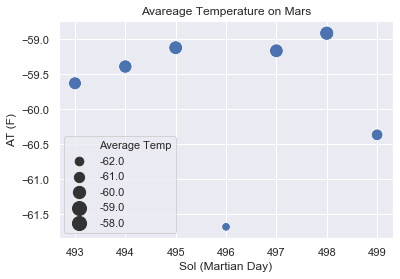

In [37]:
fig = plt.figure()
ax = sns.scatterplot(x='Sol', y='Average Temp', size=s, sizes=(75, 200),data=mars_df)
ax.set_title('Avareage Temperature on Mars')
ax.set_xlabel('Sol (Martian Day)')
ax.set_ylabel('AT (F)')
fig.savefig('Visualizations/AT.png')

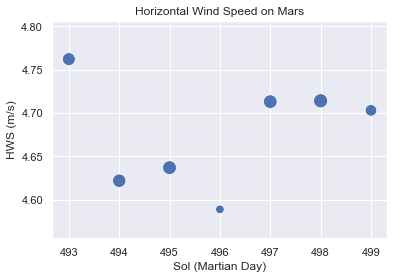

In [38]:
fig = plt.figure()
ax = sns.scatterplot(x='Sol', y='Horizontal Wind Speed', size=s, sizes=(75, 200), legend=False,data=mars_df)
ax.set_title('Horizontal Wind Speed on Mars')
ax.set_xlabel('Sol (Martian Day)')
ax.set_ylabel('HWS (m/s)')
fig.savefig('Visualizations/HWS.png')

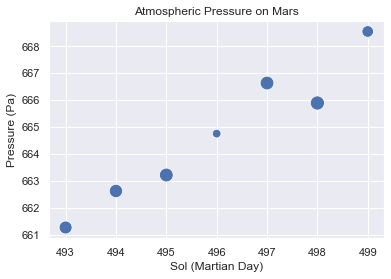

In [39]:
fig = plt.figure()
ax = sns.scatterplot(x='Sol', y='Pressure', size=s, sizes=(75, 200), legend=False,data=mars_df)
ax.set_title('Atmospheric Pressure on Mars')
ax.set_xlabel('Sol (Martian Day)')
ax.set_ylabel('Pressure (Pa)')
fig.savefig('Visualizations/Pressure.png')

In [66]:
mars_dropped=mars_df.drop(['Average Temp'], axis=1)
mars_dropped

,Sol,Date,Horizontal Wind Speed,Pressure
0,493,15-Apr-2020,4.762,661.280
1,494,16-Apr-2020,4.622,662.632
2,495,17-Apr-2020,4.637,663.224
3,496,18-Apr-2020,4.589,664.757
4,497,19-Apr-2020,4.713,666.631
5,498,20-Apr-2020,4.714,665.891
6,499,21-Apr-2020,4.703,668.540


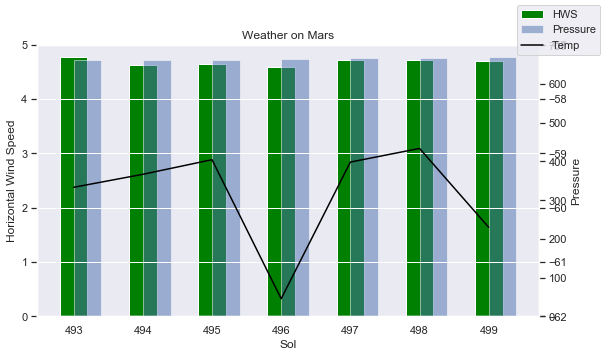

In [147]:


fig, ax1 = plt.subplots(figsize=(9,5),frameon=False)
ax1.grid(b=None)

ax1.set_title('Weather on Mars')
ax1.set_ylabel('Horizontal Wind Speed')
ax1.bar(mars_dropped['Sol'], mars_dropped['Horizontal Wind Speed'], width=.4, color='green', label='HWS')



ax1.set_xlabel('Sol')


ax2=ax1.twinx()

ax2.bar(mars_dropped['Sol'], mars_dropped['Pressure'], align='edge',alpha=.5, width=.4, label='Pressure')
ax2.set_ylabel('Pressure')
ax2.grid(b=None)

ax3=ax1.twinx()
ax3.plot(mars_df['Sol'], mars_df['Average Temp'], c='black', label='Temp')
ax3.set_ylim(-62,-57)

fig.legend(loc='upper right')
fig.savefig('Visualizations/combined.png')



In [21]:
mars_df.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Sol</th>\n      <th>Date</th>\n      <th>Average Temp</th>\n      <th>Horizontal Wind Speed</th>\n      <th>Pressure</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>492</td>\n      <td>14-Apr-2020</td>\n      <td>-59.356</td>\n      <td>4.831</td>\n      <td>658.527</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>493</td>\n      <td>15-Apr-2020</td>\n      <td>-59.627</td>\n      <td>4.762</td>\n      <td>661.280</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>494</td>\n      <td>16-Apr-2020</td>\n      <td>-59.388</td>\n      <td>4.622</td>\n      <td>662.632</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>495</td>\n      <td>17-Apr-2020</td>\n      <td>-59.119</td>\n      <td>4.637</td>\n      <td>663.224</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>496</td>\n      <td>18-Apr-2020</td>\n      <td>-61.677</td>\n 